In [1]:
from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np


# Distributions
`Table().domain(values).probability(probs)` will create a distribution

In [2]:
dist1 =Table().with_columns('Value',make_array(2, 3, 4),'Probability',make_array(0.25, 0.5, 0.25))
dist1

Value,Probability
2,0.25
3,0.5
4,0.25


In [3]:
dist2 = Table().with_columns('Value',make_array(2, 3, 12),'Probability',make_array(0.25, 0.5, 0.25))
dist2

Value,Probability
2,0.25
3,0.5
12,0.25


## Plots

Plotting is currently done with Table's hist method, which automatically normalizes the plot. Thus, even if the probabilities of the distribution itself don't sum to 1, the area of the plot will be 1. This could be misleading because it makes the input look like a distribution even though it isn't. I think I might change it so that it displays the actual heights rather than the normalized versions

Each distribution has a method called `plot()` that can take in the following parameters:
* width (default 1): Starts plot at minimum values - width/2
* mask (default none): Either a mask or a list of masks. Currently implemented with plt.bar rather than Table.hist

Distributions can also be plotted with the function `plot()`. Plotting multiple distributions requires the function plot rather than the method plot. The function takes in the following parameters:
* An even number of arguments alternating between name of distribution and the Distribution object itself
* width

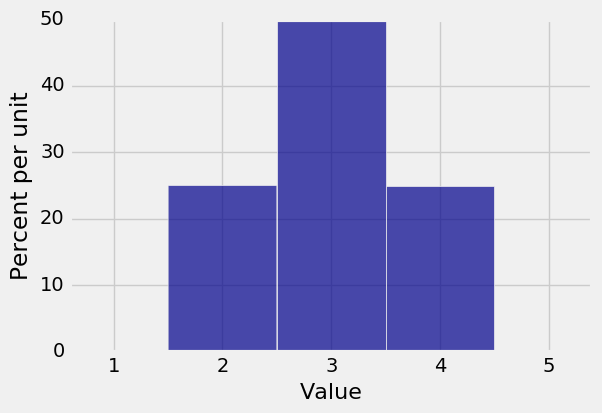

In [4]:
Plot(dist1)

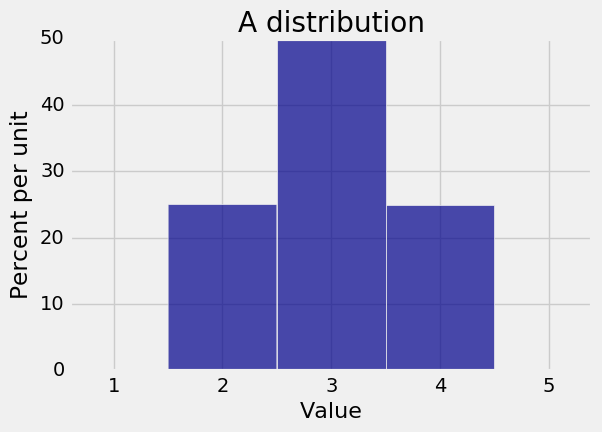

In [5]:
Plot(dist1, width=1)
plt.title("A distribution")
plt.show()

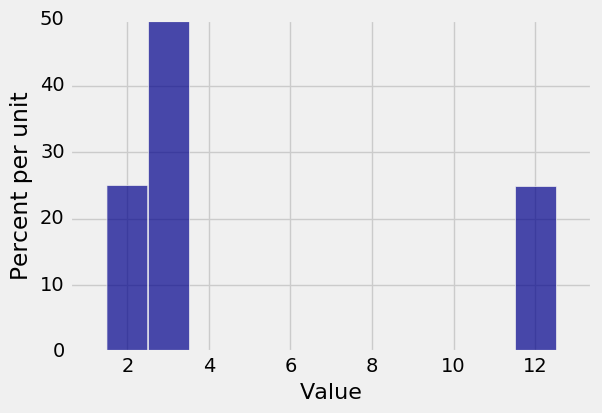

In [6]:
Plot(dist2)

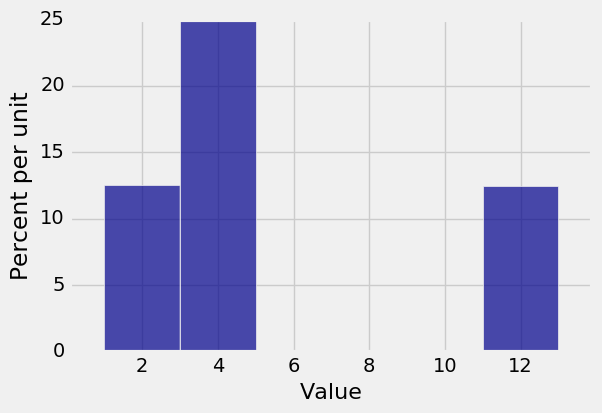

In [7]:
Plot(dist2, width=2)

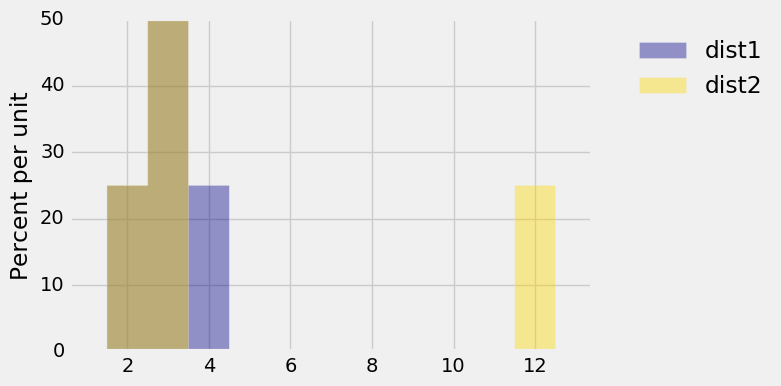

In [8]:
Plots("dist1", dist1, "dist2", dist2,alpha=.4);


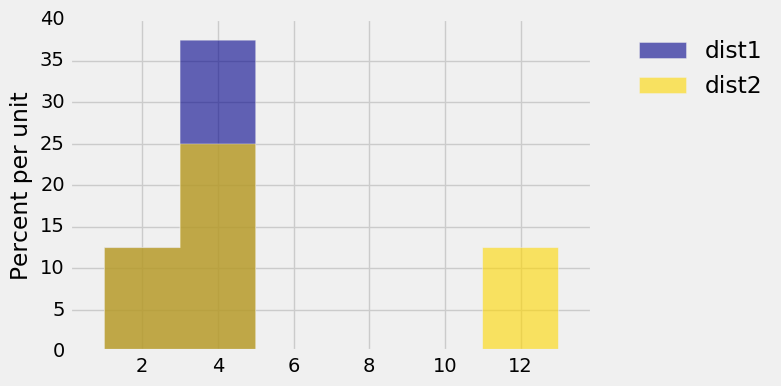

In [9]:
Plots("dist1", dist1, "dist2", dist2, width=2,alpha=.6)

## Probability functions

Distributions can also be initialized with a probability function instead of discrete probability values. The function must accept one argument and return a number

`FiniteDistribution.probability_function()`

In [10]:
from scipy.misc import comb

binomial = lambda n,p: lambda x: comb(n,x)*p**x*(1-p)**(n-x)

n =  10
p = 0.5

binDist = Table().domain(np.arange(n+1)).probability_function(binomial(n,p))
binDist

Value,Probability
0,0.000976562
1,0.00976562
2,0.0439453
3,0.117188
4,0.205078
5,0.246094
6,0.205078
7,0.117188
8,0.0439453
9,0.00976562


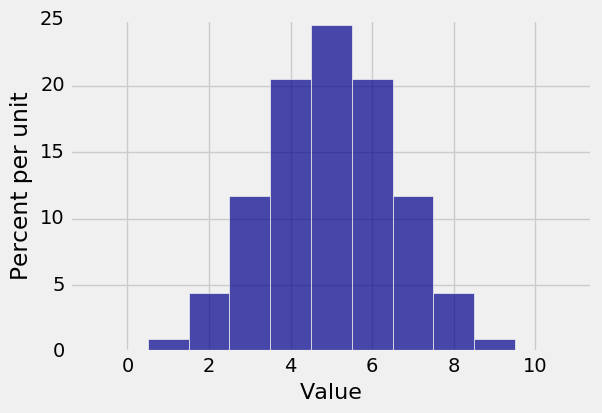

In [11]:
Plot(binDist)

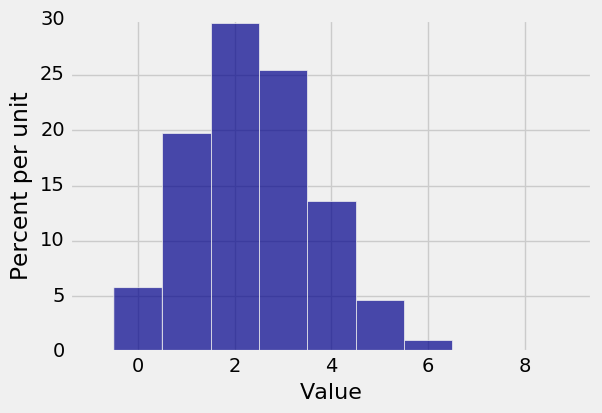

In [12]:
binDist2 = Table().domain(np.arange(9)).probability_function(binomial(8,0.3))
Plot(binDist2)

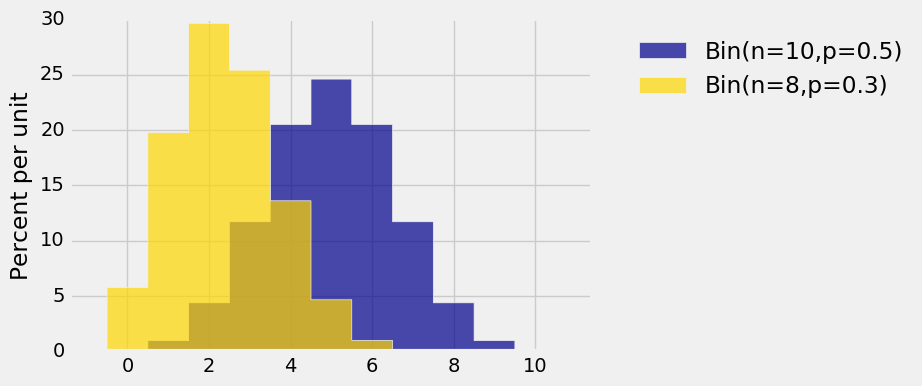

In [13]:
Plots("Bin(n=10,p=0.5)", binDist, "Bin(n=8,p=0.3)", binDist2)

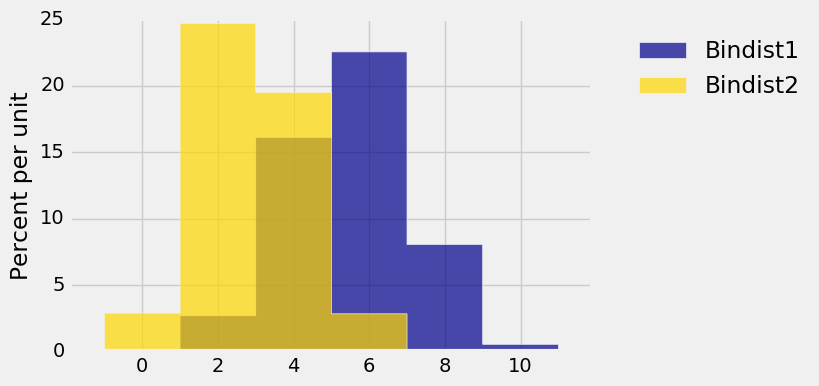

In [14]:
Plots("Bindist1", binDist, "Bindist2", binDist2, width=2)

## Events

* `dist.event(arg)` takes in a value of the domain or some kind of list of values in the domain. Returns a Table displaying them
* `dist.prob_event(arg)` same as above but returns the sum of probabilities as a float
* `dist.plot_event(arg)` same as above but plots the event(s)

In [15]:
binDist

Value,Probability
0,0.000976562
1,0.00976562
2,0.0439453
3,0.117188
4,0.205078
5,0.246094
6,0.205078
7,0.117188
8,0.0439453
9,0.00976562


In [16]:
binDist.event(np.arange(1,6,0.5))

Outcome,Probability
1,0.00976562
1.5,0
2,0.0439453
2.5,0
3,0.117188
3.5,0
4,0.205078
4.5,0
5,0.246094
5.5,0


In [17]:
binDist.prob_event([1,3,5])

0.373046875

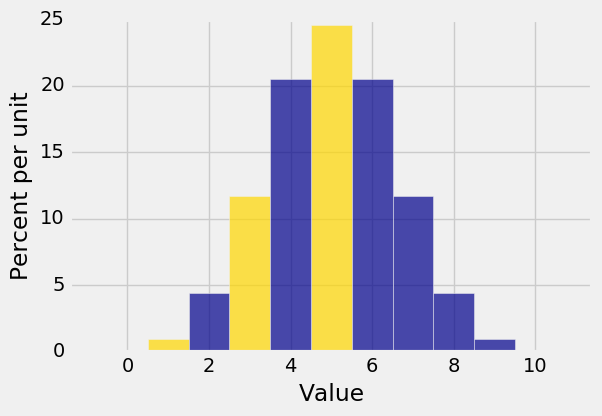

In [18]:
Plot(binDist, event=[1,3,5])

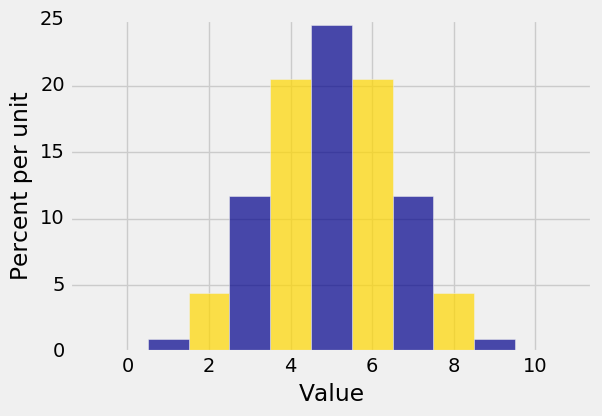

In [19]:
Plot(binDist, event=np.arange(0,10,2))

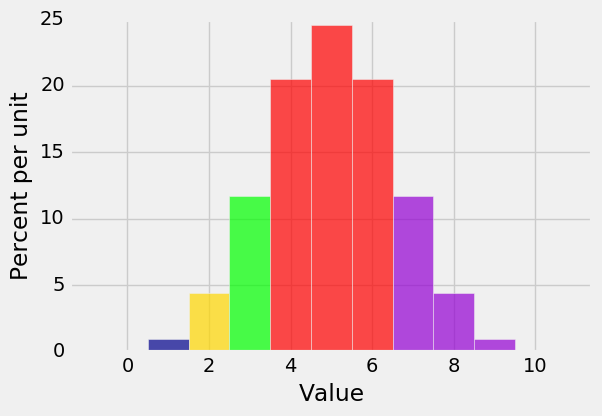

In [20]:
Plot(binDist, event=[[1],[2],[3],[4,5,6]])

## Infinite Distribution

Infinite distributions can be represented as finite ones for visual purposes

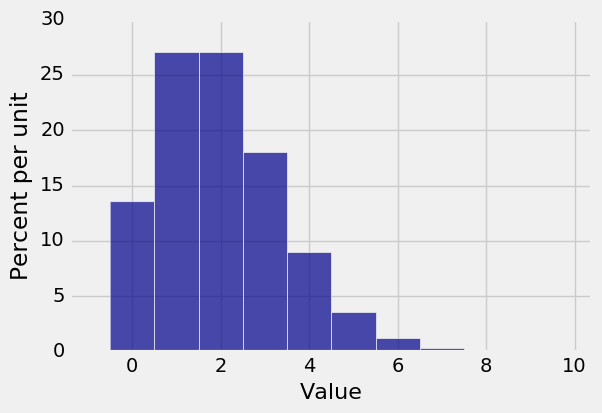

In [21]:
mu = 2
import math
def poisson(k):
    return math.exp(-mu) * mu ** k / math.factorial(k)

pois = Table().domain(np.arange(0,10)).probability_function(poisson)
Plot(pois)

# Masks

Right now masks only work with width=1 and plots the distribution as a plt.bar.

Masks must be the same length as the domain of the distribution

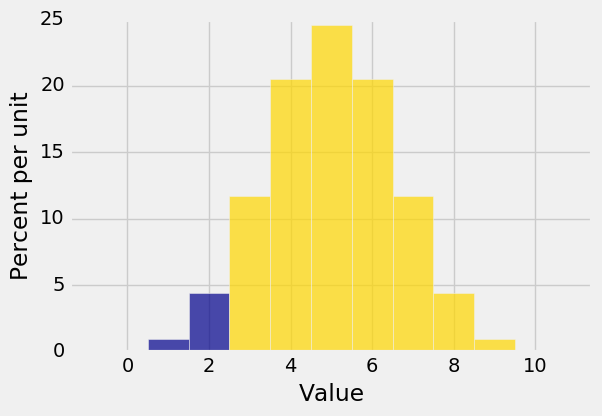

In [22]:
domain = np.arange(0,11)
Plot(binDist, mask=domain<3)

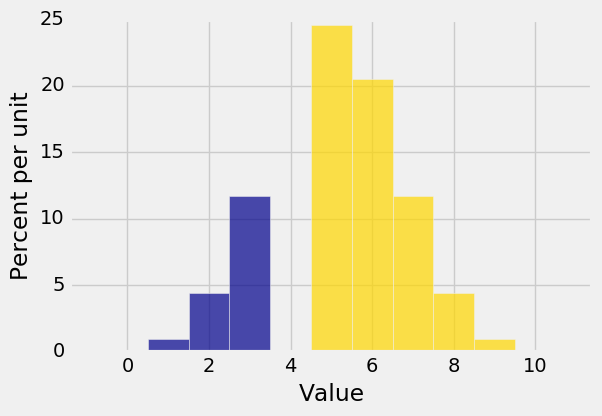

In [23]:
Plot(binDist, mask=[domain<4, domain>4])

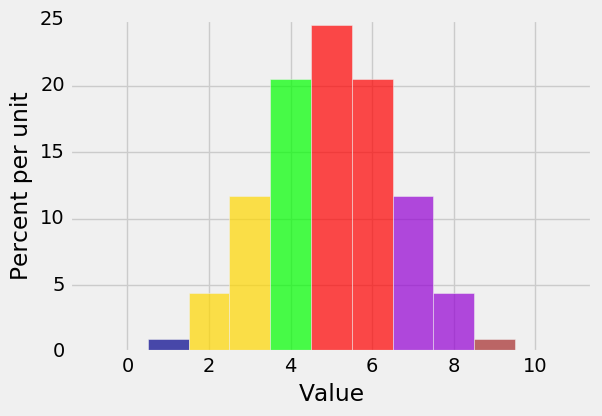

In [24]:
ev = binDist.expected_value()
sd = binDist.sd()

Plot(binDist, mask=[domain<ev-2*sd,
                  np.logical_and(domain>=ev-2*sd,domain<ev-sd),
                  np.logical_and(domain>=ev-sd,domain<ev),
                  np.logical_and(domain>=ev,domain<ev+sd),
                  np.logical_and(domain>=ev+sd,domain<ev+2*sd),
                  domain>=ev+2*sd])

In [25]:
u = Table().domain(np.arange(10)).probability(np.ones(10))
u.normalized()

Value,Probability
0,0.1
1,0.1
2,0.1
3,0.1
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1


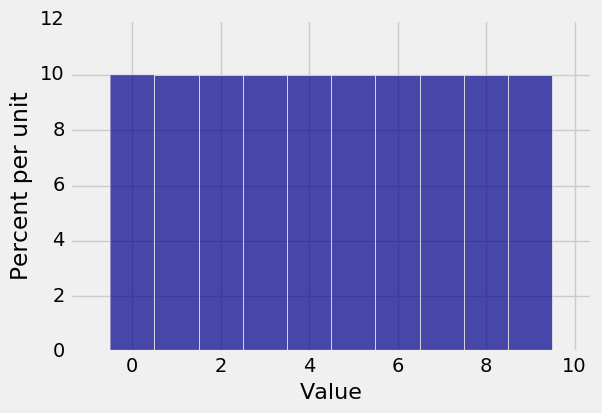

In [26]:
Plot(u)

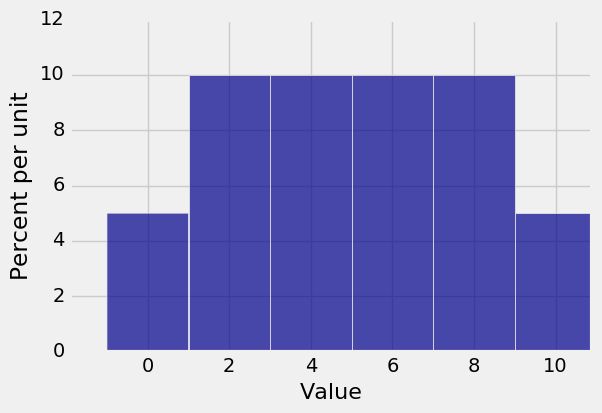

In [27]:
Plot(u, width=2)

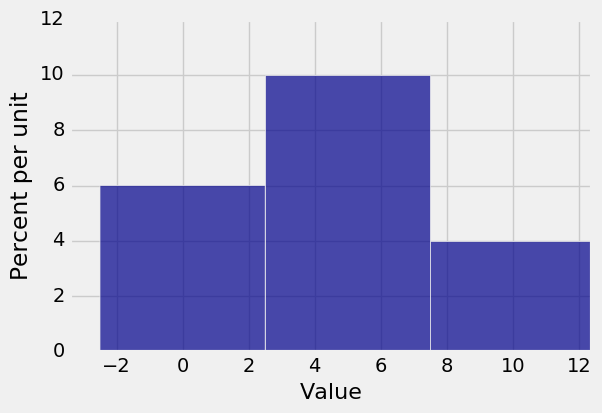

In [28]:
Plot(u, width=5)

## Birthday Problem Variants

In [29]:
previous_days = np.arange(365)
prob_all_different = np.cumprod((365-previous_days)/365)

prev_people = np.arange(1, 365)
first_match = prob_all_different[:-1]*prev_people/365
first_match = np.append(0, first_match)

exactly_one_match = prob_all_different[:-1]*prev_people*(prev_people+1)/(2*365)
exactly_one_match = np.append(0, exactly_one_match)

second_match = exactly_one_match[:-1]*(prev_people-1)/365
second_match = np.append(0, second_match)

In [30]:
match_1 = Table().domain(np.arange(1, 366)).probability(first_match)
match_2 = Table().domain(np.arange(1, 366)).probability(second_match)

(0, 100)

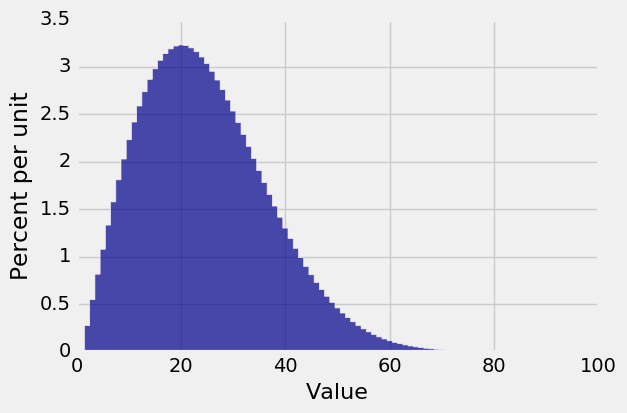

In [31]:
Plot(match_1)
plt.xlim(0, 100)

(0, 100)

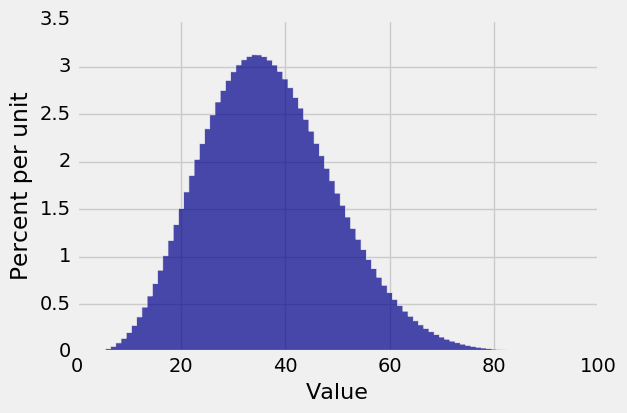

In [32]:
Plot(match_2)
plt.xlim(0, 100)

(0, 100)

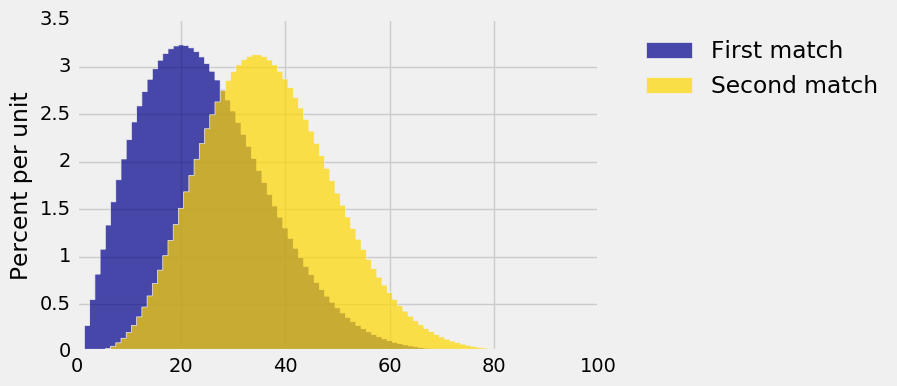

In [33]:
Plots("First match", match_1, "Second match", match_2)
plt.xlim(0, 100)

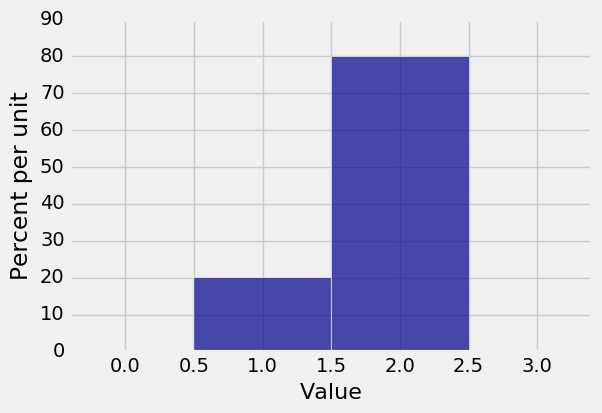

In [34]:
Plot(Table().domain([1, 1.5, 2]).probability([0.2, 0.4, 0.4]))

In [35]:
Table().domain(["H", "T"]).probability([0.5, 0.5])

Value,Probability
H,0.5
T,0.5
